# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ihsanu Ramdan Mustofa
- **Email:** danimustofa1@gmail.com
- **ID Dicoding:** ihsanu_ramdan

## Menentukan Pertanyaan Bisnis

1. Dimana lokasi customer yang paling banyak membeli produk penjual di e-commerce ini?
2. Seberapa cepat pengiriman yang dilakukan oleh penjual di e-commerce ini?
3. Bagaimana tingkat kepuasan customer terhadap layanan yang diberikan?
4. Apa saja produk yang paling banyak terjual dan yang paling sedikit terjual?
5. Bagaimana analisis RFM untuk segmentasi pelanggan berdasarkan *recency*, *frequency*, dan *monetary*? (Analisis Lanjutan)

## Import Semua Packages/Library yang Digunakan

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
- Bertujuan untuk mengumpulkan data dan memasukkan seluruh data kedalam variabel agar bisa dilakukan pemrosesan data pada tahapan selanjutnya.
- Data diperoleh dari "E-Commerce Public Dataset", kumpulan data dari sebuah e-commerce, yang disediakan oleh Dicoding. Dataset ini meliputi:
    1. customers_dataset
    2. geolocation_dataset
    3. order_items_dataset
    4. order_payments_dataset
    5. order_reviews_dataset
    6. orders_dataset
    7. product_category_name_translation
    8. products_dataset
    9. sellers_dataset

In [279]:
# Data pelanggan
customer_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [280]:
# Data lokasi pelanggan
geo_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [281]:
# Data item yang dipesan
orderItems_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/order_items_dataset.csv')
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [282]:
# Data jenis pembayaran untuk setiap pemesanan
orderPayments_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/order_payments_dataset.csv')
orderPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [283]:
# Data skor penilaian untuk setiap pemesanan
orderReviews_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/order_reviews_dataset.csv')
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [284]:
# Data status pemesanan (beserta tanggal order sampai tanggal barang terkirim)
orders_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [285]:
# Data terjemahan produk (bahasa portugis -> inggris)
productTranslation_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/product_category_name_translation.csv')
productTranslation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [286]:
# Data spesifikasi produk
products_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [287]:
# Data penjual
sellers_df = pd.read_csv('https://raw.githubusercontent.com/ihsanuramdan/dicoding/refs/heads/main/assets/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Data yang diperoleh terdiri atas data pelanggan, lokasi pelanggan, riwayat pemesanan (meliputi jenis pembayaran dan review pelanggan), data produk yang terjual, serta data penjual.
- Beberapa dataset yang ada dapat di gabung menggunakan key berupa id pemesanan, id produk, id pelanggan, dan id penjual

### Assessing Data

In [288]:
# cek informasi untuk tiap data (jumlah dan tipe data)

print("1. Informasi untuk customer_datasets:\n")
customer_df.info()
print('\n\n2. Informasi untuk geolocation_datasets:\n')
geo_df.info()
print('\n\n3. Informasi untuk order_items_dataset:\n')
orderItems_df.info()
print('\n\n4. Informasi untuk order_payments_dataset:\n')
orderPayments_df.info()
print('\n\n5. Informasi untuk order_reviews_dataset:\n')
orderReviews_df.info()
print('\n\n6. Informasi untuk orders_dataset:\n')
orders_df.info()
print('\n\n7. Informasi untuk product_category_name_translation:\n')
productTranslation_df.info()
print('\n\n8. Informasi untuk products_dataset:\n')
products_df.info()
print('\n\n9. Informasi untuk sellers_dataset:\n')
sellers_df.info()

1. Informasi untuk customer_datasets:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


2. Informasi untuk geolocation_datasets:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng         

In [289]:
# cek data null untuk tiap DataFrame

print("1. Informasi data null untuk customer_datasets:\n", customer_df.isnull().sum())
print('\n\n2. Informasi data null untuk geolocation_datasets:\n', geo_df.isnull().sum())
print('\n\n3. Informasi data null untuk order_items_dataset:\n', orderItems_df.isnull().sum())
print('\n\n4. Informasi data null untuk order_payments_dataset:\n', orderPayments_df.isnull().sum())
print('\n\n5. Informasi data null untuk order_reviews_dataset:\n', orderReviews_df.isnull().sum())
print('\n\n6. Informasi data null untuk orders_dataset:\n', orders_df.isnull().sum())
print('\n\n7. Informasi data null untuk product_category_name_translation:\n', productTranslation_df.isnull().sum())
print('\n\n8. Informasi data null untuk products_dataset:\n', products_df.isnull().sum())
print('\n\n9. Informasi data null untuk sellers_dataset:\n', sellers_df.isnull().sum())

1. Informasi data null untuk customer_datasets:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


2. Informasi data null untuk geolocation_datasets:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


3. Informasi data null untuk order_items_dataset:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


4. Informasi data null untuk order_payments_dataset:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


5. Informasi data null untuk order_reviews_dataset:
 review_id                      0
order_id                    

In [290]:
# cek data null yang ditemukan dalam order_reviews_dataset
orderReviews_df[orderReviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [291]:
# cek data null yang ditemukan dalam orders_dataset
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [292]:
# cek data null yang ditemukan dalam orders_dataset
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [293]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
# cek data duplikat untuk tiap DataFrame

print("1. Informasi data duplikat untuk customer_datasets:", customer_df.duplicated().sum())
print('2. Informasi data duplikat untuk geolocation_datasets:', geo_df.duplicated().sum())
print('3. Informasi data duplikat untuk order_items_dataset:', orderItems_df.duplicated().sum())
print('4. Informasi data duplikat untuk order_payments_dataset:', orderPayments_df.duplicated().sum())
print('5. Informasi data duplikat untuk order_reviews_dataset:', orderReviews_df.duplicated().sum())
print('6. Informasi data duplikat untuk orders_dataset:', orders_df.duplicated().sum())
print('7. Informasi data duplikat untuk product_category_name_translation:', productTranslation_df.duplicated().sum())
print('8. Informasi data duplikat untuk products_dataset:', products_df.duplicated().sum())
print('9. Informasi data duplikat untuk sellers_dataset:', sellers_df.duplicated().sum())

1. Informasi data duplikat untuk customer_datasets: 0
2. Informasi data duplikat untuk geolocation_datasets: 261831
3. Informasi data duplikat untuk order_items_dataset: 0
4. Informasi data duplikat untuk order_payments_dataset: 0
5. Informasi data duplikat untuk order_reviews_dataset: 0
6. Informasi data duplikat untuk orders_dataset: 0
7. Informasi data duplikat untuk product_category_name_translation: 0
8. Informasi data duplikat untuk products_dataset: 0
9. Informasi data duplikat untuk sellers_dataset: 0


In [295]:
# cek data duplikat yang ditemukan dalam geolocation_datasets:

duplicate_geo = geo_df[geo_df.duplicated(keep=False)]
duplicate_geo.sort_values(by=['geolocation_zip_code_prefix','geolocation_lat'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
519,1001,-23.551337,-46.634027,sao paulo,SP
583,1001,-23.551337,-46.634027,sao paulo,SP
818,1001,-23.551337,-46.634027,sao paulo,SP
206,1001,-23.550498,-46.634338,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
...,...,...,...,...,...
999899,99980,-28.387432,-51.847727,david canabarro,RS
999958,99980,-28.387059,-51.848964,david canabarro,RS
1000129,99980,-28.387059,-51.848964,david canabarro,RS
999775,99980,-28.386689,-51.847091,david canabarro,RS


In [296]:
# cek statistik deskriptif untuk tiap DataFrame

print('\n\n1. Informasi statistik deskriptif untuk customer_datasets:\n', customer_df.describe(include='all'))
print('\n\n2. Informasi statistik deskriptif untuk geolocation_datasets:\n', geo_df.describe(include='all'))
print('\n\n3. Informasi statistik deskriptif untuk order_items_dataset:\n', orderItems_df.describe(include='all'))
print('\n\n4. Informasi statistik deskriptif untuk order_payments_dataset:\n', orderPayments_df.describe(include='all'))
print('\n\n5. Informasi statistik deskriptif untuk order_reviews_dataset:\n', orderReviews_df.describe(include='all'))
print('\n\n6. Informasi statistik deskriptif untuk orders_dataset:\n', orders_df.describe(include='all'))
print('\n\n7. Informasi statistik deskriptif untuk product_category_name_translation:\n', productTranslation_df.describe(include='all'))
print('\n\n8. Informasi statistik deskriptif untuk products_dataset:\n', products_df.describe(include='all'))
print('\n\n9. Informasi statistik deskriptif untuk sellers_dataset:\n', sellers_df.describe(include='all'))



1. Informasi statistik deskriptif untuk customer_datasets:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

 

**Insight:**

**A. Tipe Data**

Ditemukan kesalahan tipe data pada dataset pemesanan (orders_dataset), meliputi:
1. object (seharusnya datetime):
- order_items_dataset (shipping_limit_date)
- order_reviews_dataset (review_creation_date, review_answer_timestamp)
- orders_dataset  (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date)
2. int (seharusnya str/object):
- customers_dataset (customer_zip_code_prefix)
- geolocation_dataset (geolocation_zip_code_prefix)
- order_items_dataset (order_item_id)
- sellers_dataset (seller_zip_code_prefix)

**B. Missing Value**
1. Ditemukan pada data review pelanggan (order_reviews_dataset), hal ini disebabkan karena beberapa pelanggan tidak mengisi kolom review.
2. Ditemukan pada data pemesanan (orders_dataset), hal ini disebabkan karena beberapa pesanan statusnya belum terkirim dan juga ada yang di cancel.
3. Ditemukan pada data produk (products_dataset), hal ini disebabkan karena beberapa produk tersebut tidak memiliki kategori.

**C. Duplicate Data**
1. Ditemukan 261831 data duplikat pada geolocation_dataset. Dataset ini berisikan lokasi yang meliputi latitude dan longitude.

**D. Innacurate Value**
1. Tidak ditemukan anomali data/outliers
    

### Cleaning Data

**A. Tipe Data**

1. Mengubah tipedata object menjadi datetime

In [297]:
datetime_orderItems = ["shipping_limit_date"]

for column in datetime_orderItems:
  orderItems_df[column] = pd.to_datetime(orderItems_df[column])

In [298]:
datetime_orderReviews = ["review_creation_date","review_answer_timestamp"]

for column in datetime_orderReviews:
  orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

In [299]:
datetime_orders = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [300]:
print('1. Informasi terbaru untuk order_items_dataset:\n')
orderItems_df.info()
print('\n\n2. Informasi terbaru untuk order_reviews_dataset:\n')
orderReviews_df.info()
print('\n\n3. Informasi terbaru untuk orders_dataset:\n')
orders_df.info()

1. Informasi terbaru untuk order_items_dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


2. Informasi terbaru untuk order_reviews_dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------     

2. Mengubah tipe data int menjadi str/object

In [301]:
customer_df['customer_zip_code_prefix'] = customer_df['customer_zip_code_prefix'].astype(str)
geo_df['geolocation_zip_code_prefix'] = geo_df['geolocation_zip_code_prefix'].astype(str)
orderItems_df['order_item_id'] = orderItems_df['order_item_id'].astype(str)
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype(str)

In [302]:
print('1. Informasi terbaru untuk customers_datasets:\n')
customer_df.info()
print('\n\n2. Informasi terbaru untuk geolocation_datasets:\n')
geo_df.info()
print('\n\n3. Informasi terbaru untuk order_items_datasets:\n')
orderItems_df.info()
print('\n\n4. Informasi terbaru untuk seller_datasets:\n')
sellers_df.info()

1. Informasi terbaru untuk customers_datasets:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


2. Informasi terbaru untuk geolocation_datasets:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng  

**B. Missing Value**

Menyesuaikan data Null agar seluruh data memiliki nilai

In [303]:
# Mengisi review yang kosong dengan tulisan "no comment"
orderReviews_df.fillna(value="no comment", inplace=True)

In [304]:
orderReviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [305]:

orders_clean_df = orders_df.dropna()
print(orders_clean_df.info())
print(orders_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dty

**C. Duplicate Data**

Menghapus data yang duplikat

In [306]:
# hapus data duplikat untuk geo_df
geo_df.drop_duplicates(inplace=True)

In [307]:
print("Jumlah data duplikat:", geo_df.duplicated().sum())

Jumlah data duplikat: 0


**Insight:**
- Tipe data tanggal disesuaikan menggunakan format datetime. Untuk id juga sudah disesuaikan menggunakan format string/object.
- Data yang kosong diisi dengan isian yang sesuai. Apabila tidak ada yang sesuai maka ketika melakukan eksplor data perlu melakukan filter untuk mengatasi data-data yang kosong.
- Data yang duplikat dihapus supaya bisa menghilangkan data-data yang tidak diperlukan serta mempercepat proses analisis data.

## Exploratory Data Analysis (EDA)

### 1. Explore **customer_df**

In [308]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [309]:
customer_df[customer_df['customer_zip_code_prefix'] == '22790']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1922,3885c59916b2b261205c303fe0a10abf,f72d1ee92d55688d07ca88506300715e,22790,rio de janeiro,RJ
2090,383c957ec162c9147f9aab26161af5c6,38e9ba7e543c33ae95a697ed2566dc00,22790,rio de janeiro,RJ
3032,8cdc6dfaa3c3c78f28848dd50f812605,aec58f69315474c125cfbc4b073d1754,22790,rio de janeiro,RJ
3046,ff43182cf77e7ee5609976d3f7a7bade,09252bc15c7c9e9b2538343227d15826,22790,rio de janeiro,RJ
3290,945e56ab9a4d329e972c8de67d70fd4f,1a6a081b4672e22ac8a9c93f0583a87c,22790,rio de janeiro,RJ
...,...,...,...,...,...
96963,80cf55a439bbb373aea40a08515fb39b,22770768e9c650851b78132a4d881128,22790,rio de janeiro,RJ
98744,f3309994e8de398daa7ebcd5479cf689,ce4ea52bbd9acb2f47afbc1486b0fa91,22790,rio de janeiro,RJ
99010,a408804c2ca25f708718ea11750de00f,dbab7e7f2f9001c2afd509d4116ca726,22790,rio de janeiro,RJ
99118,fd636f2e6a579b3241357a76b71b88e6,43edb847a2edc6849200624355f20159,22790,rio de janeiro,RJ


In [310]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [311]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Insight untuk **customer_df:**
- Jumlah pembeli terbanyak berdasarkan kodepos adalah di wilayah Rio de Janiero (22790) sejumlah 142 orang
- Jumlah pembeli terbanyak berdasarkan kotanya adalah dari kota Sao Paulo sejumlah 15540 orang
- Jumlah pembeli terbanyak berdasarkan negara bagiannya (state) adalah dari Negara Bagian Sao Paulo (Sao Paulo State - SP) sejumlah 41746 orang

### 2. Explore **geo_df**

In [312]:
geo_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332,738332.000000,738332.000000,738332,738332
unique,19015,NaN,NaN,8011,27
top,38400,NaN,NaN,sao paulo,SP
freq,779,NaN,NaN,79927,285976
mean,NaN,-20.998353,-46.461098,NaN,NaN
std,NaN,5.892315,4.393705,NaN,NaN
min,NaN,-36.605374,-101.466766,NaN,NaN
25%,NaN,-23.603061,-48.867822,NaN,NaN
50%,NaN,-22.873588,-46.647278,NaN,NaN
75%,NaN,-19.923336,-43.836974,NaN,NaN


In [313]:
geo_df[geo_df['geolocation_zip_code_prefix'] == '38400']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
645450,38400,-18.915960,-48.278974,uberlandia,MG
645456,38400,-18.900442,-48.260759,uberlandia,MG
645460,38400,-18.913015,-48.262132,uberlandia,MG
645461,38400,-18.922381,-48.282111,uberlandia,MG
645471,38400,-18.922160,-48.271125,uberlandia,MG
...,...,...,...,...,...
650433,38400,-18.913148,-48.288200,uberlândia,MG
650434,38400,-18.915238,-48.297562,uberlandia,MG
650439,38400,-18.898682,-48.260058,uberlândia,MG
650440,38400,-18.887050,-48.265336,uberlandia,MG


### 3. Explore **orderItems_df**

In [314]:
orderItems_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650,112650,112650,112650.000000,112650.000000
unique,98666,21,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,1,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,98666,527,2033,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,NaN,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,NaN,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### 4. Explore **orderPayments_df**

In [315]:
orderPayments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### 5. Explore **orderReviews_df**

In [316]:
orderReviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,no comment,no comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [317]:
review_time = orderReviews_df["review_answer_timestamp"] - orderReviews_df["review_creation_date"]
review_time = review_time.apply(lambda x: x.total_seconds())
orderReviews_df["review_time"] = round(review_time/86400)

In [318]:
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comment,no comment,2018-01-18,2018-01-18 21:46:59,1.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comment,no comment,2018-03-10,2018-03-11 03:05:13,1.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comment,no comment,2018-02-17,2018-02-18 14:36:24,2.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comment,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0


### 6. Explore **orders_df**

In [319]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [320]:
estimatedDeliver_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
estimatedDeliver_time = estimatedDeliver_time.apply(lambda x: x.total_seconds())
orders_df["estimated_deliver_time"] = round(estimatedDeliver_time/86400)

deliver_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
deliver_time = deliver_time.apply(lambda x: x.total_seconds())
orders_df["deliver_time"] = round(deliver_time/86400)

In [321]:
orders_df['time_df'] = orders_df['deliver_time'] - orders_df['estimated_deliver_time']

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_deliver_time,deliver_time,time_df
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,8.0,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19.0,14.0,-5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,9.0,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,13.0,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,3.0,-9.0


In [322]:
orders_df["deliver_status"] = orders_df["time_df"].apply(lambda x: "on time delivery" if x <= 0 else "late delivery" if x > 0 else x)

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_deliver_time,deliver_time,time_df,deliver_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,8.0,-8.0,on time delivery
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19.0,14.0,-5.0,on time delivery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,9.0,-18.0,on time delivery
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,13.0,-13.0,on time delivery
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,3.0,-9.0,on time delivery


In [323]:
orders_df['deliver_status'] = orders_df.deliver_status.fillna(orders_df.order_status)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_deliver_time,deliver_time,time_df,deliver_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,8.0,-8.0,on time delivery
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19.0,14.0,-5.0,on time delivery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,9.0,-18.0,on time delivery
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,13.0,-13.0,on time delivery
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,3.0,-9.0,on time delivery


### 7. Explore **productTranslation_df**

In [324]:
productTranslation_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 8. Explore **products_df**

In [325]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### 9. Explore **sellers_df**

In [326]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,3442f8959a84dea7ee197c632cb2df15,14940,sao paulo,SP
freq,1,49,694,1849


### 10. Explore **customerOrders_df**

In [327]:
# Untuk menggabungkan beberapa dataframe, dikaitkan dengan id yang ada

customerOrders_df = pd.merge(
    left=customer_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customerOrders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_deliver_time,deliver_time,time_df,deliver_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,19.0,9.0,-10.0,on time delivery
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,24.0,17.0,-7.0,on time delivery
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,24.0,26.0,2.0,late delivery
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,27.0,15.0,-12.0,on time delivery
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,17.0,11.0,-6.0,on time delivery


In [328]:
customerOrders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [329]:
customerOrders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### 11. Explore **orderPaymentsReviews_df**

In [330]:
orderPaymentsReviews_df = pd.merge(
    left=orderPayments_df,
    right=orderReviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orderPaymentsReviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00,6.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16,3.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30,4.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31,1.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39,1.0


In [331]:
orderPaymentsReviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [332]:
orderPaymentsReviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39,2.0
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10,1.0
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41,1.0
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27,4.0
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40,2.0
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27,4.0
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54,1.0


In [333]:
orderPaymentsReviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### 12. Explore **customerOrdersPaymentsReviews**

In [334]:
customerOrdersPaymentsReviews_df = pd.merge(
    left=customerOrders_df,
    right=orderPaymentsReviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customerOrdersPaymentsReviews_df.head()
     

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,5.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29,12.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,7.0


### 13. Explore **orderItemsSellers_df**

In [335]:
orderItemsSellers_df = pd.merge(
    left=orderItems_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orderItemsSellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [336]:
orderItemsSellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

### 14. Explore **productsComplete_df**

In [337]:
productsComplete_df = pd.merge(
    left=products_df,
    right=productTranslation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
productsComplete_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [338]:
productsComplete_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

### 15. Explore **orderItemsSellersProducts_df**

In [339]:
orderItemsSellersProducts_df = pd.merge(
    left=productsComplete_df,
    right=orderItemsSellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orderItemsSellersProducts_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


### 16. Explore **all_df**

In [340]:
all_df = pd.merge(
    left=customerOrdersPaymentsReviews_df,
    right=orderItemsSellersProducts_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP


In [341]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  object        
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dimana lokasi customer yang paling banyak membeli produk penjual di e-commerce ini?

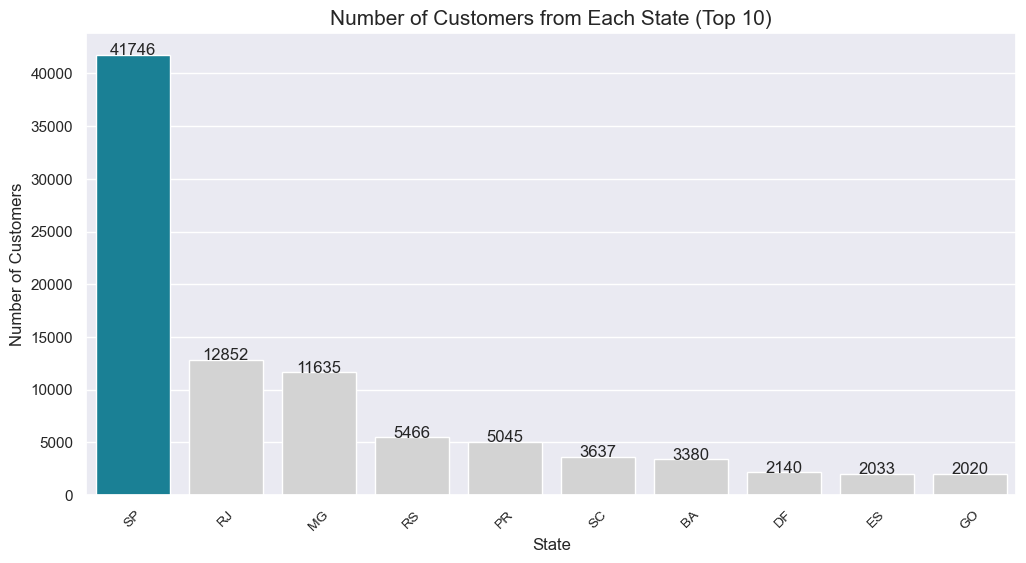

In [342]:
customerState_df = all_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

topState_df = customerState_df.idxmax()

customerState_df = customerState_df.sort_values(ascending=False)

sns.barplot(x=customerState_df.index,
            y=customerState_df.values,
            palette=["#068DA9" if city == topState_df else "#D3D3D3" for city in customerState_df.index],
            hue=customerState_df.index,
            legend=False
            )

for i in range(len(customerState_df.index)):
        plt.text(i,customerState_df.values[i],customerState_df.values[i],ha='center')

plt.title("Number of Customers from Each State (Top 10)", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()

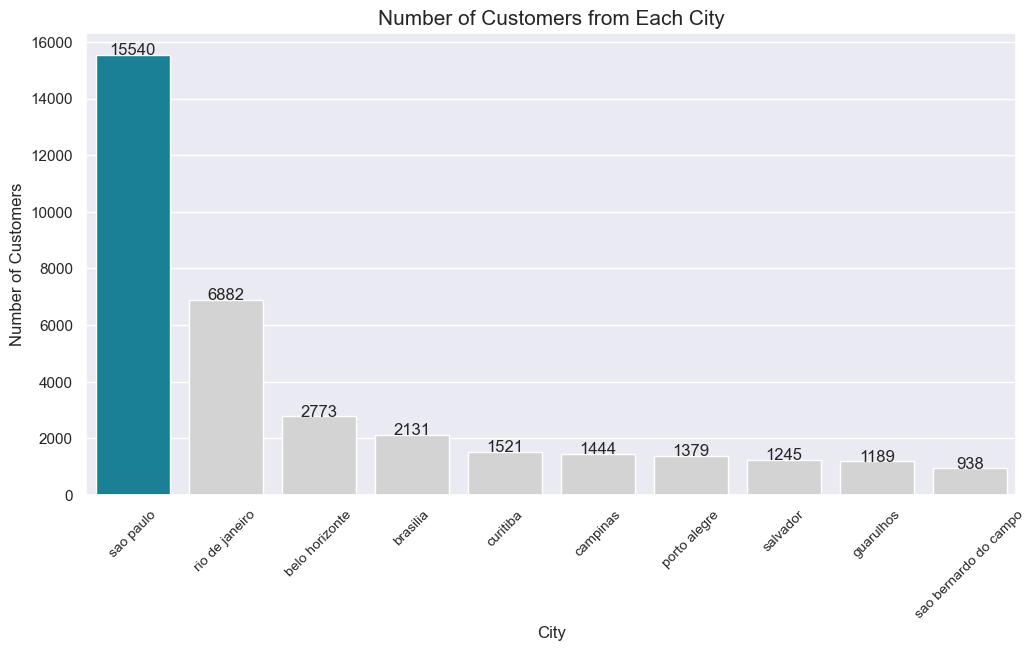

In [343]:
customerCity_df = customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

topCity_df = customerCity_df.idxmax()

customerCity_df = customerCity_df.sort_values(ascending=False)

sns.barplot(x=customerCity_df.index,
            y=customerCity_df.values,
            palette=["#068DA9" if city == topCity_df else "#D3D3D3" for city in customerCity_df.index],
            hue=customerCity_df.index,
            legend=False
            )

for i in range(len(customerCity_df.index)):
        plt.text(i,customerCity_df.values[i],customerCity_df.values[i],ha='center')

plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Kesimpulan:

- Jumlah pembeli terbanyak berdasarkan negara bagiannya (state) adalah dari Negara Bagian Sao Paulo (Sao Paulo State - SP) sejumlah 41746 pembeli
- Jumlah pembeli terbanyak berdasarkan kotanya adalah dari kota Sao Paulo sejumlah 15540 orang

### Pertanyaan 2: Seberapa cepat pengiriman yang dilakukan oleh penjual di e-commerce ini?

In [344]:
deliverStatus_df = all_df.groupby(by="deliver_status").customer_id.nunique().sort_values(ascending=False).reset_index()
deliverStatus_df

,deliver_status,customer_id
0,on time delivery,88966
1,late delivery,7510
2,shipped,1107
3,canceled,619
4,unavailable,609
5,invoiced,314
6,processing,301
7,delivered,8
8,created,5
9,approved,2


In [345]:
#the top 2
deliveryTop2_df = deliverStatus_df[:2].copy()
deliveryTop2_df

,deliver_status,customer_id
0,on time delivery,88966
1,late delivery,7510


In [346]:
#others
deliveryOthers_df = pd.DataFrame(data = {
    'deliver_status' : ['others'],
    'customer_id' : [deliverStatus_df['customer_id'][2:].sum()]
})

deliveryOthers_df

,deliver_status,customer_id
0,others,2965


In [347]:
#combining top 5 with others
deliverStatus2_df = pd.concat([deliveryTop2_df, deliveryOthers_df]).reset_index(drop=True)

deliverStatus2_df

,deliver_status,customer_id
0,on time delivery,88966
1,late delivery,7510
2,others,2965


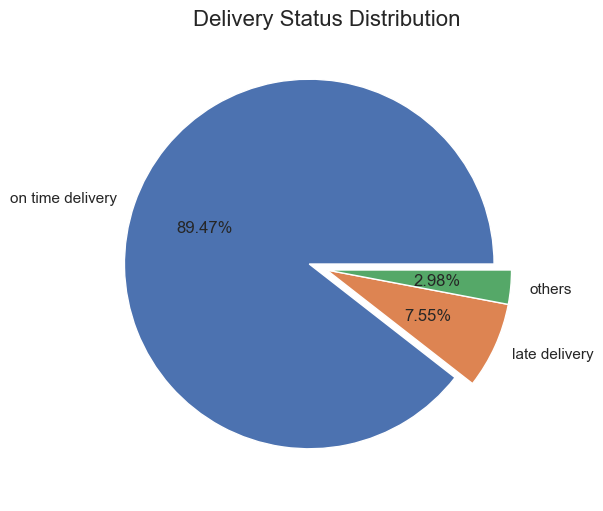

In [348]:
plt.figure(figsize=(6,6))

plt.pie(
    x = deliverStatus2_df['customer_id'],
    labels = deliverStatus2_df['deliver_status'],
    autopct='%1.2f%%',
    explode= (0.1,0,0),
)

plt.title(
    label="Delivery Status Distribution", 
    fontdict={"fontsize":16},
    pad=10
)

plt.show()

Kesimpulan:

- Pengiriman yang tepat waktu angkanya hampir mencapai 90%, sedangkan yang terlambat tidak sampai 8%

### Pertanyaan 3: Bagaimana tingkat kepuasan customer terhadap layanan yang diberikan? 

In [349]:
all_df['review_score'].value_counts().sort_values(ascending=False)

review_score
5.0    66343
4.0    22319
1.0    15425
3.0     9894
2.0     4162
Name: count, dtype: int64

In [350]:
all_df['review_score'].mean()

4.015658989529638

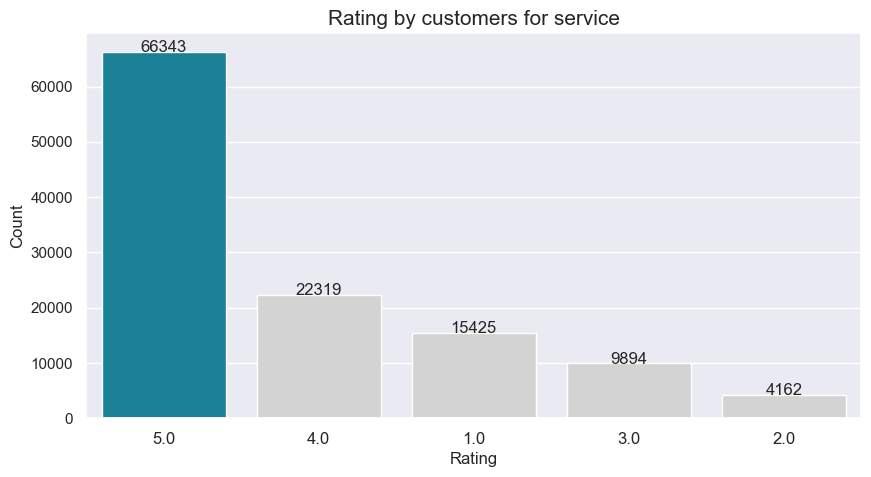

In [351]:
reviewScores_df = all_df['review_score'].value_counts().sort_values(ascending=False)

topScore_df = reviewScores_df.idxmax()

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=reviewScores_df.index,
            y=reviewScores_df.values,
            order=reviewScores_df.index,
            hue_order=reviewScores_df.index,
            hue=reviewScores_df.index,
            legend= False,
            palette=["#068DA9" if score == topScore_df else "#D3D3D3" for score in reviewScores_df.index],
            )

for i in range(len(reviewScores_df.index)):
        plt.text(i,reviewScores_df.values[i],reviewScores_df.values[i],ha='center')

plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

Kesimpulan:

- Rata-rata penilaian dari seluruh toko di aplikasi e-commerce ini adalah 4.02
- Customer yang memberikan rating 5 memiliki data terbanyak daripada rating yang lainnya. Namun demikian perlu juga untuk melihat review yang memiliki rating 1 dengan tujuan membuat perbaikan

### Pertanyaan 4: Apa saja produk yang paling banyak terjual dan yang paling sedikit terjual?

In [352]:
orderItemsSum_df = all_df.groupby("product_category_name_english")["product_id"].count().reset_index()
orderItemsSum_df = orderItemsSum_df.rename(columns={"product_id": "products"})
orderItemsSumMax_df = orderItemsSum_df.sort_values(by="products", ascending=False)

orderItemsSumMax_df.head(10)

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
49,housewares,7380
70,watches_gifts,6213
68,telephony,4726
42,garden_tools,4590
5,auto,4400


In [353]:
orderItemsSumMin_df = orderItemsSum_df.sort_values(by="products", ascending=True)

orderItemsSumMin_df.head(10)

,product_category_name_english,products
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,14
52,la_cuisine,16
3,arts_and_craftmanship,24
32,fashion_sport,31
46,home_comfort_2,31
35,flowers,33
23,diapers_and_hygiene,39
55,music,40


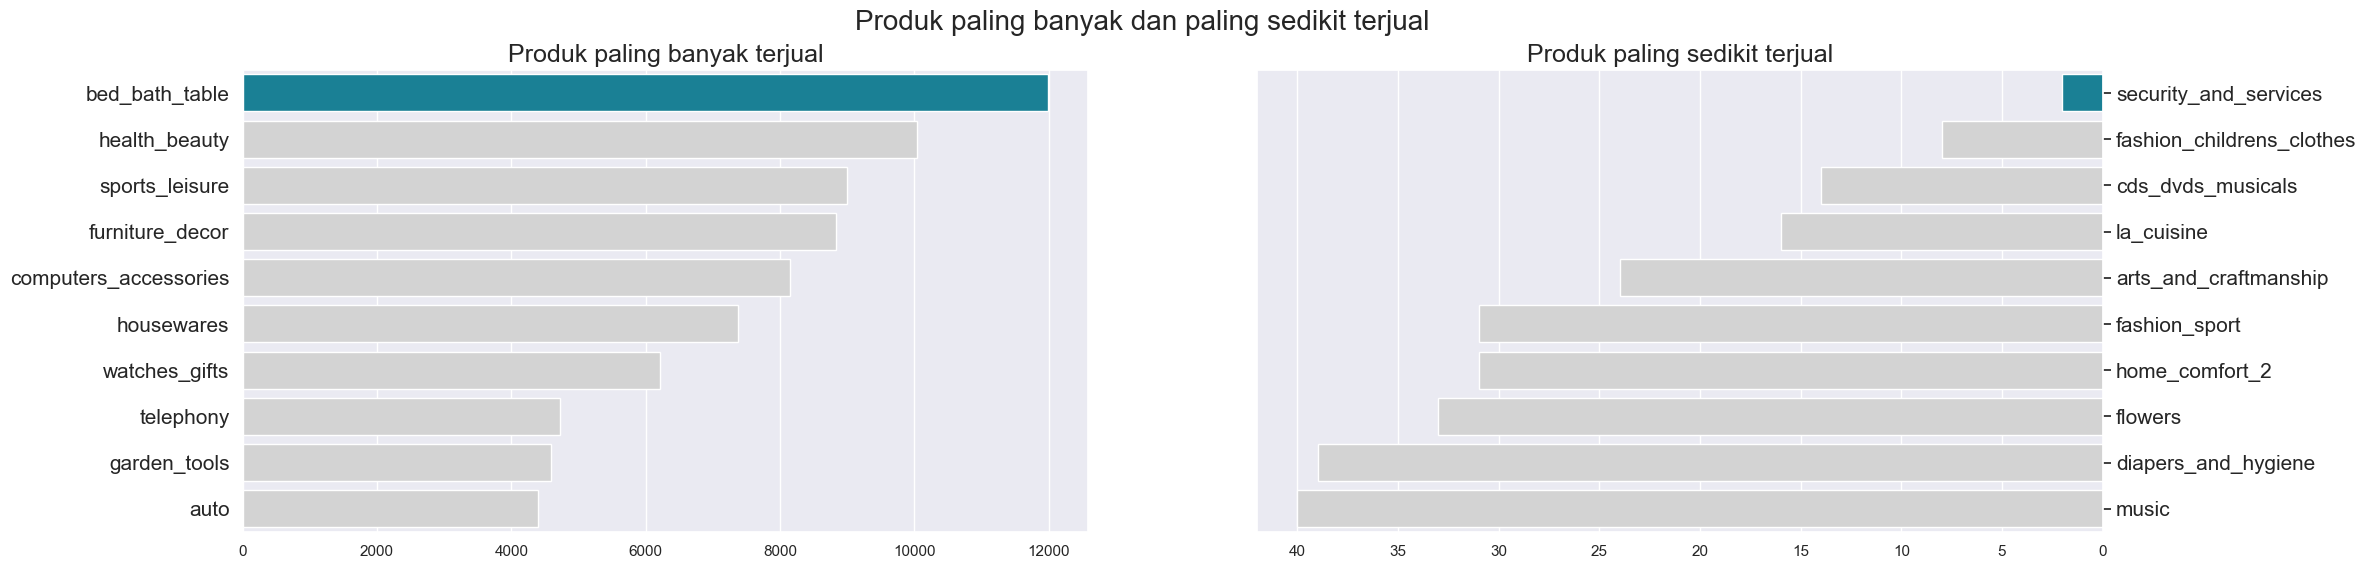

In [354]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=orderItemsSumMax_df.head(10), hue="product_category_name_english", palette=colors, legend= False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=orderItemsSumMin_df.head(10), hue="product_category_name_english", palette=colors, legend= False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

Kesimpulan:

- Produk yang paling banyak terjual adalah dalam kategori **bed_bath_table**
- Produk yang paling sedikit terjual adalah dalam kategori **security_and_services**

## Analisis Lanjutan (Opsional)

### Pertanyaan 5: Bagaimana analisis RFM untuk segmentasi pelanggan berdasarkan *recency*, *frequency*, dan *monetary*? (Analisis Lanjutan)

Melakukan analisis RFM (Recency, Frequency, Monetary), yang bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:

- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [355]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df

,customer_unique_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,4134.84
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,84.58
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,112.46
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,133.69


In [356]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


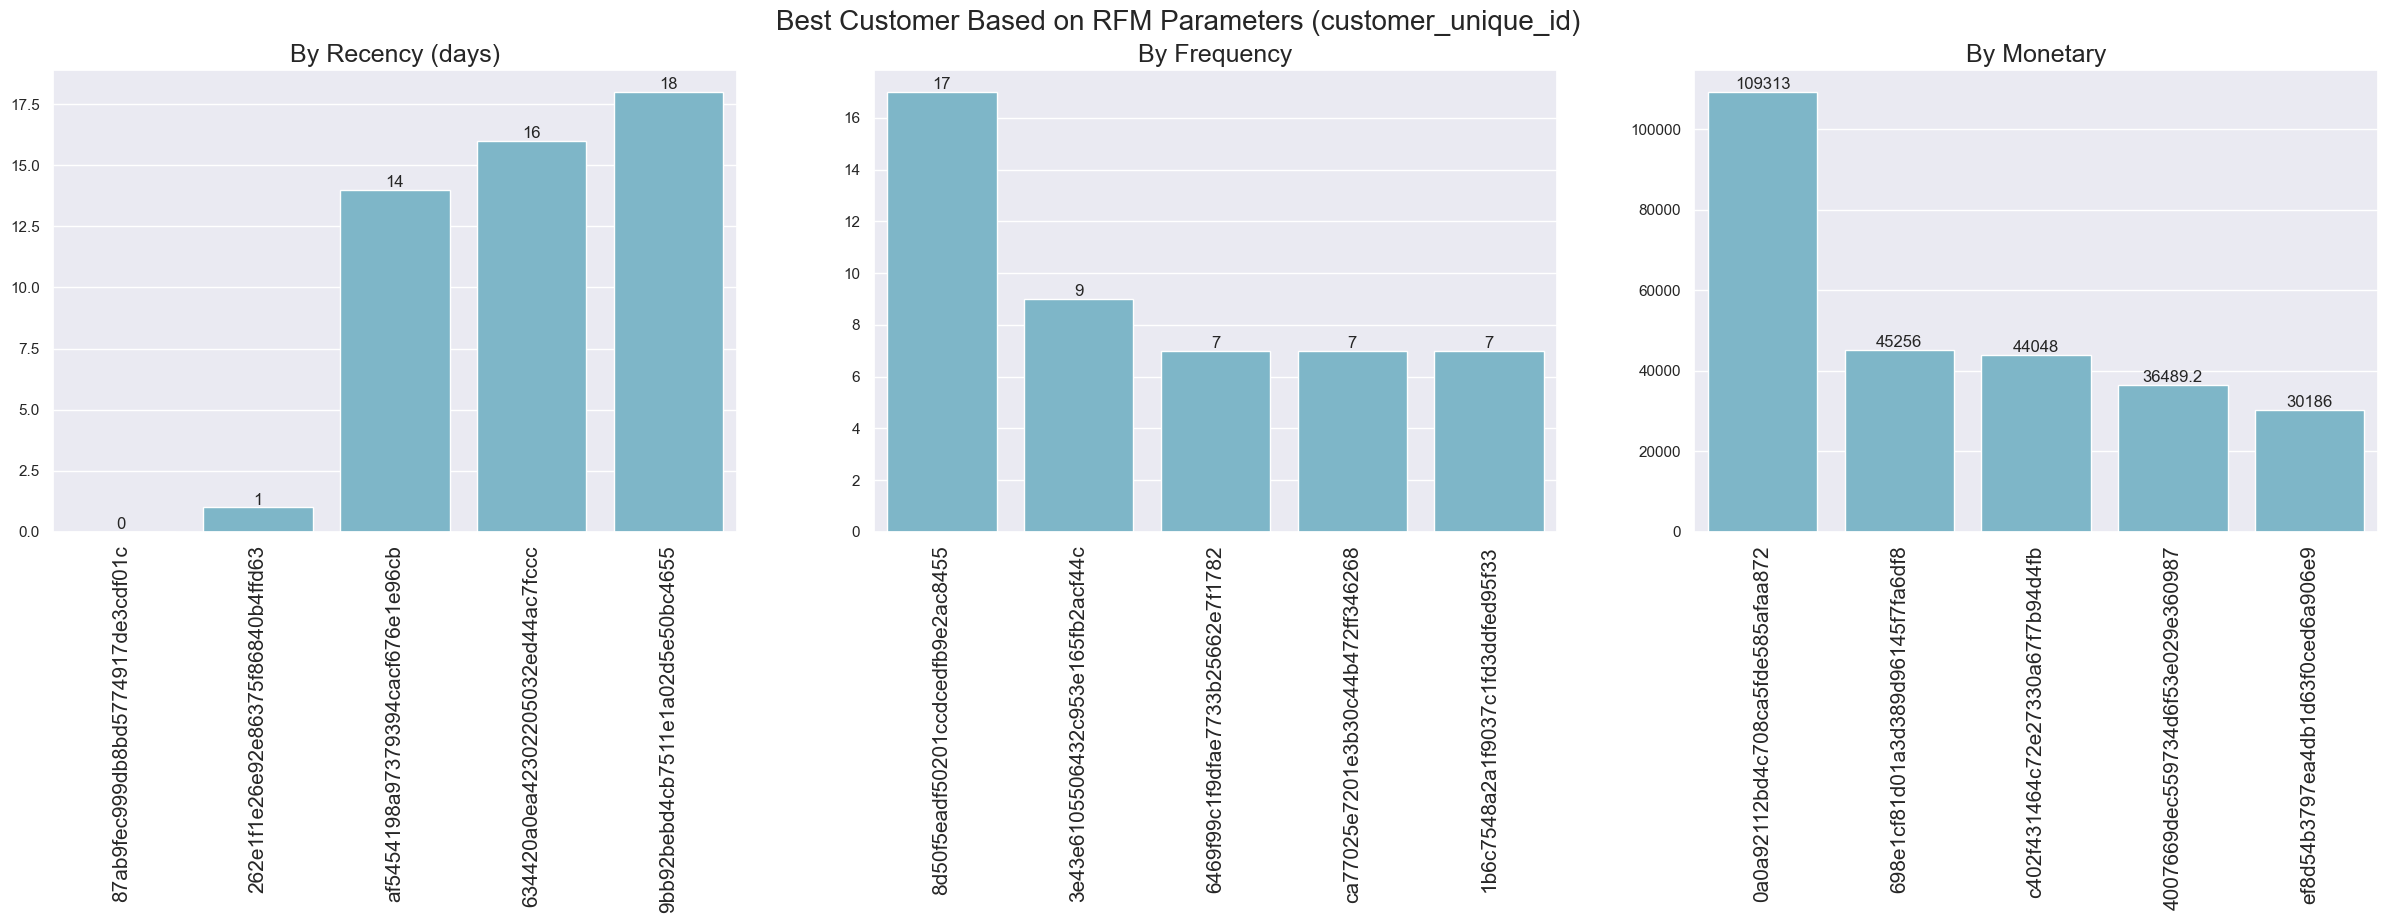

In [357]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="customer_unique_id", palette=colors, legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
ax[0].bar_label(ax[0].containers[2])
ax[0].bar_label(ax[0].containers[3])
ax[0].bar_label(ax[0].containers[4])

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="customer_unique_id", palette=colors, legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].bar_label(ax[1].containers[2])
ax[1].bar_label(ax[1].containers[3])
ax[1].bar_label(ax[1].containers[4])
 
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="customer_unique_id", palette=colors, legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)
ax[2].bar_label(ax[2].containers[0])
ax[2].bar_label(ax[2].containers[1])
ax[2].bar_label(ax[2].containers[2])
ax[2].bar_label(ax[2].containers[3])
ax[2].bar_label(ax[2].containers[4]) 

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

Kesimpulan:

- Dalam Kategori *Recency*, 5 pelanggan terbaru yang membeli produk ada di rentang waktu **0 s.d. 18 hari**
- Dalam Kategori *Frequency*, 5 pelanggan yang paling sering membeli produk ada di rentang frekuensi **7 s.d. 17 kali**
- Dalam Kategori *Monetary*, 5 pelanggan yang membeli produk dengan pengeluaran tertinggi ada di rentang nilai **30186 s.d. 109313 Real Brasil**
- Menggunakan analisis RFM ini nantinya dapat dilakukan analisis lebih dalam untuk menentukan strategi apa yang akan digunakan kepada tiap jenis pelanggan sesuai dengan kategorinya

## Conclusion

1. Dimana lokasi customer yang paling banyak membeli produk penjual di e-commerce ini?

>- Jumlah pembeli terbanyak berdasarkan negara bagiannya (state) adalah dari Negara Bagian Sao Paulo (Sao Paulo State - SP) sejumlah 41746 pembeli
>- Jumlah pembeli terbanyak berdasarkan kotanya adalah dari kota Sao Paulo sejumlah 15540 orang

2. Seberapa cepat pengiriman yang dilakukan oleh penjual di e-commerce ini?

>- Pengiriman yang tepat waktu angkanya hampir mencapai 90%, sedangkan yang terlambat tidak sampai 8%

3. Bagaimana tingkat kepuasan customer terhadap layanan yang diberikan?

>- Rata-rata penilaian dari seluruh toko di aplikasi e-commerce ini adalah 4.02
>- Customer yang memberikan rating 5 memiliki data terbanyak daripada rating yang lainnya. Namun demikian perlu juga untuk melihat review yang memiliki rating 1 dengan tujuan membuat perbaikan

4. Apa saja produk yang paling banyak terjual dan yang paling sedikit terjual?

>- Produk yang paling banyak terjual adalah dalam kategori **bed_bath_table**
>- Produk yang paling sedikit terjual adalah dalam kategori **security_and_services**

5. Bagaimana analisis RFM untuk segmentasi pelanggan berdasarkan *recency*, *frequency*, dan *monetary*? (Analisis Lanjutan)

>- Dalam Kategori *Recency*, 5 pelanggan terbaru yang membeli produk ada di rentang waktu **0 s.d. 18 hari**
>- Dalam Kategori *Frequency*, 5 pelanggan yang paling sering membeli produk ada di rentang frekuensi **7 s.d. 17 kali**
>- Dalam Kategori *Monetary*, 5 pelanggan yang membeli produk dengan pengeluaran tertinggi ada di rentang nilai **30186 s.d. 109313 Real Brasil**
>- Menggunakan analisis RFM ini nantinya dapat dilakukan analisis lebih dalam untuk menentukan strategi apa yang akan digunakan kepada tiap jenis pelanggan sesuai dengan kategorinya

In [358]:
all_df.to_csv("all_data.csv", index=False)